In [1]:
using PyPlot
using Flux
using Flux: binarycrossentropy, gradient

In [2]:
K = 100
# offset of classes
q = 0.6
# define 4 clusters of input data
A = adjoint([rand(1, K).-q; rand(1, K).+q])
B = adjoint([rand(1, K).+q; rand(1, K).+q])
C = adjoint([rand(1, K).+q; rand(1, K).-q])
D = adjoint([rand(1, K).-q; rand(1, K).-q]);

In [3]:
AC = [A; C]
BD = [B; D];

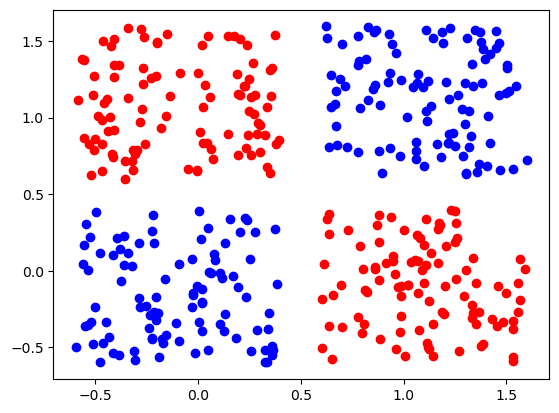

PyObject <matplotlib.collections.PathCollection object at 0x000000007D5EA580>

In [4]:
scatter(AC[:, 1], AC[:, 2], color="red")
scatter(BD[:, 1], BD[:, 2], color="blue")

In [5]:
X = [AC; BD]
y = [ones(200); zeros(200)];

In [22]:
model = Chain(Dense(2, 5, relu), Dense(5, 1, sigmoid))

Chain(Dense(2, 5, relu), Dense(5, 1, σ))

In [23]:
ps = Flux.params(model)
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}())

In [24]:
function apply_threshold(proba, threshold=0.5)
    if proba[1] >= threshold
        return 1.0
    else
        return 0.0
    end
end

apply_threshold (generic function with 2 methods)

In [25]:
function loss_and_accuracy(model, X, y)
    accuracy = 0
    loss = 0.0f0
    num = 0
    n_rows = size(y)[1]
    for i in range(1, n_rows)
        ŷ = model(X[i, :])[1]
        loss += binarycrossentropy(ŷ, y[i])
        accuracy += sum(apply_threshold(ŷ) .== y[i])
    end
    return loss/n_rows, accuracy/n_rows
end

loss_and_accuracy (generic function with 1 method)

In [27]:
for epoch in 1:100
    for i in range(1, size(y)[1])
        gs = gradient(() -> binarycrossentropy(model(X[i,:])[1], y[i]), ps)
        Flux.Optimise.update!(opt, ps, gs)
    end
    println("Epoch: $epoch")
    train_loss, train_acc = loss_and_accuracy(model, X, y)
    println("  train_loss = $train_loss, train_accuracy = $train_acc")
    println()
    
    if train_acc .>= 0.99
        break
    end
end

Epoch: 1
  train_loss = 0.6500738858431577 (tracked), train_accuracy = 0.7025

Epoch: 2
  train_loss = 0.6087587735056877 (tracked), train_accuracy = 0.6925

Epoch: 3
  train_loss = 0.5762663331255317 (tracked), train_accuracy = 0.6975

Epoch: 4
  train_loss = 0.547138978652656 (tracked), train_accuracy = 0.705

Epoch: 5
  train_loss = 0.520118965189904 (tracked), train_accuracy = 0.7425

Epoch: 6
  train_loss = 0.4946941682975739 (tracked), train_accuracy = 0.7525

Epoch: 7
  train_loss = 0.4693150703795254 (tracked), train_accuracy = 0.77

Epoch: 8
  train_loss = 0.44431475580204277 (tracked), train_accuracy = 0.79

Epoch: 9
  train_loss = 0.42145223579369484 (tracked), train_accuracy = 0.8175

Epoch: 10
  train_loss = 0.39947950387140735 (tracked), train_accuracy = 0.8275

Epoch: 11
  train_loss = 0.3791083663434256 (tracked), train_accuracy = 0.84

Epoch: 12
  train_loss = 0.3597383732383605 (tracked), train_accuracy = 0.855

Epoch: 13
  train_loss = 0.3419197371264454 (tracked), t